# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.613  1  1.157 0.284 0.006   
                             age        0.099  1  0.187 0.666 0.001   
                             Kiel       1.870  1  3.526 0.062 0.018   
                             Magdeburg  3.990  1  7.523 0.007 0.038   
                             Sweden     6.174  1 11.640 0.001 0.057   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.612  1  0.623 0.431 0.003   
                             age        2.031  1  2.066 0.152 0.011   
                             Kiel       0.086  1  0.088 0.768 0.000   
                             Magdeburg  1.941  1  1.975 0.162 0.010   
                             Sweden    17.261  1 17.558 0.000 0.084   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.547  0.446    False  
                             age               0.177  0.782    False  
                             Kiel              1.208  0.144    False  
                             Magdeburg         2.176  0.024     True  
                             Sweden            3.103  0.004     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.366  0.590    False  
                             age               0.817  0.284    False  
                             Kiel              0.115  0.856    False  
                             Magdeburg         0.792  0.296    False  
                             Sweden            4.371  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.632  1  4.196 0.042 0.021   
                             age        0.007  1  0.049 0.825 0.000   
                             Kiel       0.353  1  2.343 0.128 0.012   
                             Magdeburg  0.858  1  5.704 0.018 0.029   
                             Sweden     2.298  1 15.268 0.000 0.074   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.485  1  0.761 0.384 0.004   
                             age        0.517  1  0.265 0.607 0.001   
                             Kiel       8.330  1  4.268 0.040 0.022   
                             Magdeburg 20.846  1 10.681 0.001 0.053   
                             Sweden     0.027  1  0.014 0.906 0.000   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.378  0.099    False  
                             age               0.084  0.891    False  
                             Kiel              0.894  0.239    False  
                             Magdeburg         1.747  0.050     True  
                             Sweden            3.888  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.416  0.533    False  
                             age               0.217  0.726    False  
                             Kiel              1.396  0.096    False  
                             Magdeburg         2.891  0.005     True  
                             Sweden            0.043  0.945    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.284         0.547  0.446    False   
                             age       0.666         0.177  0.782    False   
                             Kiel      0.062         1.208  0.144    False   
                             Magdeburg 0.007         2.176  0.024     True   
                             Sweden    0.001         3.103  0.004     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.431         0.366  0.590    False   
                             age       0.152         0.817  0.284    False   
                             Kiel      0.768         0.115  0.856    False   
                             Magdeburg 0.162         0.792  0.296    False   
                             Sweden    0.000         4.371  0.000     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.042         1.378  0.099    False  
                             age       0.825         0.084  0.891    False  
                             Kiel      0.128         0.894  0.239    False  
                             Magdeburg 0.018         1.747  0.050     True  
                             Sweden    0.000         3.888  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.384         0.416  0.533    False  
                             age       0.607         0.217  0.726    False  
                             Kiel      0.040         1.396  0.096    False  
                             Magdeburg 0.001         2.891  0.005     True  
                             Sweden    0.906         0.043  0.945    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.475     0.337     0.245         2.743     0.312
std       0.302         5.303     0.330     0.298         5.175     0.325
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.332     0.014     0.002         0.366     0.008
50%       0.119         0.923     0.239     0.096         1.019     0.191
75%       0.466         2.445     0.621     0.430         2.711     0.574
max       1.000       147.179     1.000     1.000        85.655     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.284         0.547   
A0A024R0T9;K7ER74;P02655                           AD     0.052         1.285   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.098         1.009   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.502         0.299   
A0A075B6H7                                         AD     0.154         0.813   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.060         1.225   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.268         0.572   
S4R3U6                                             AD     0.431         0.366   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.446    False   
A0A024R0T9;K7ER74;P02655                           AD      0.125    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.206    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.652    False   
A0A075B6H7                                         AD      0.286    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.140    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.429    False   
S4R3U6                                             AD      0.590    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.042         1.378   
A0A024R0T9;K7ER74;P02655                           AD     0.027         1.568   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.296         0.529   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.298         0.526   
A0A075B6H7                                         AD     0.341         0.467   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.054         1.266   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.523         0.281   
S4R3U6                                             AD     0.384         0.416   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.099    False  
A0A024R0T9;K7ER74;P02655                           AD      0.070    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.444    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.447    False  
A0A075B6H7                                         AD      0.491    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.401     0.338     0.249         1.495     0.321
std       0.291         1.638     0.317     0.293         1.798     0.317
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.011         0.357     0.037     0.010         0.360     0.030
50%       0.126         0.900     0.248     0.102         0.991     0.201
75%       0.439         1.943     0.598     0.437         2.020     0.580
max       0.997        22.880     0.998     0.999        26.295     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1027,1007


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.284         0.547  0.446   
A0A024R0T9;K7ER74;P02655                           0.052         1.285  0.125   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.098         1.009  0.206   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.502         0.299  0.652   
A0A075B6H7                                         0.154         0.813  0.286   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.060         1.225  0.140   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.268         0.572  0.429   
S4R3U6                                             0.431         0.366  0.590   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.042   
A0A024R0T9;K7ER74;P02655                              False 0.027   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.296   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.298   
A0A075B6H7                                            False 0.341   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.054   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.523   
S4R3U6                                                False 0.384   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.378  0.099   
A0A024R0T9;K7ER74;P02655                                   1.568  0.070   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.529  0.444   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.526  0.447   
A0A075B6H7                                                 0.467  0.491   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.303   
Q9Y6X5                                                     1.266  0.122   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.281  0.657   
S4R3U6                                                     0.416  0.533   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    971
PI (yes) - QRILC (yes)   358
PI (no)  - QRILC (yes)    56
PI (yes) - QRILC (no)     36
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A075B6I0                                         0.024         1.627  0.067   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2              0.009         2.060  0.030   
A0A087WWT2;Q9NPD7                                  0.051         1.295  0.123   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2           0.012         1.933  0.038   
A0A087X1V2                                         0.016         1.805  0.048   
...                                                  ...           ...    ...   
Q9NZR2                                             0.056         1.253  0.133   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI... 0.001         2.950  0.005   
Q9ULP0-3;Q9ULP0-6                                  0.005         2.314  0.018   
Q9UNW1                                             0.009         2.048  0.031   
Q9UQ52                                             0.048         1.323  0.117   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A075B6I0                                            False 0.002   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2                  True 0.036   
A0A087WWT2;Q9NPD7                                     False 0.005   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2               True 0.050   
A0A087X1V2                                             True 0.026   
...                                                     ...   ...   
Q9NZR2                                                False 0.013   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...     True 0.023   
Q9ULP0-3;Q9ULP0-6                                      True 0.033   
Q9UNW1                                                 True 0.128   
Q9UQ52                                                False 0.004   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A075B6I0                                                 2.673  0.008   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2                      1.444  0.088   
A0A087WWT2;Q9NPD7                                          2.318  0.017   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2                   1.302  0.114   
A0A087X1V2                                                 1.588  0.068   
...                                                          ...    ...   
Q9NZR2                                                     1.882  0.038   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...         1.633  0.062   
Q9ULP0-3;Q9ULP0-6                                          1.479  0.082   
Q9UNW1                                                     0.894  0.239   
Q9UQ52                                                     2.379  0.015   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A075B6I0                                             True       194  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2                 False       114  
A0A087WWT2;Q9NPD7                                      True       193  
A0A087X152;D6RE16;E0CX15;O95185;O95185-2              False       176  
A0A087X1V2                                            False       178  
...                                                     ...       ...  
Q9NZR2                                                 True       145  
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...    False       115  
Q9ULP0-3;Q9ULP0-6                                     False       136  
Q9UNW1                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.446,0.099,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.125,0.070,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.206,0.444,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.652,0.447,196,PI (no) - QRILC (no)
A0A075B6H7,0.286,0.491,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.315,0.303,197,PI (no) - QRILC (no)
Q9Y6X5,0.140,0.122,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.914,0.003,86,PI (no) - QRILC (yes),0.911
A0A0C4DG76;Q5JZ08;Q9BQS7;Q9BQS7-2;Q9BQS7-3;Q9BQS7-4,0.043,0.885,54,PI (yes) - QRILC (no),0.842
P43004;P43004-2;P43004-3,0.846,0.037,89,PI (no) - QRILC (yes),0.809
A0A1W2PQ94;B4DS77;B4DS77-2;B4DS77-3,0.515,0.023,69,PI (no) - QRILC (yes),0.492
P07196,0.509,0.022,77,PI (no) - QRILC (yes),0.488
...,...,...,...,...,...
Q92542;Q92542-2,0.062,0.047,193,PI (no) - QRILC (yes),0.014
P05160,0.040,0.051,154,PI (yes) - QRILC (no),0.011
Q8TAB3;Q8TAB3-2;Q8TAB3-3,0.057,0.047,172,PI (no) - QRILC (yes),0.010


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


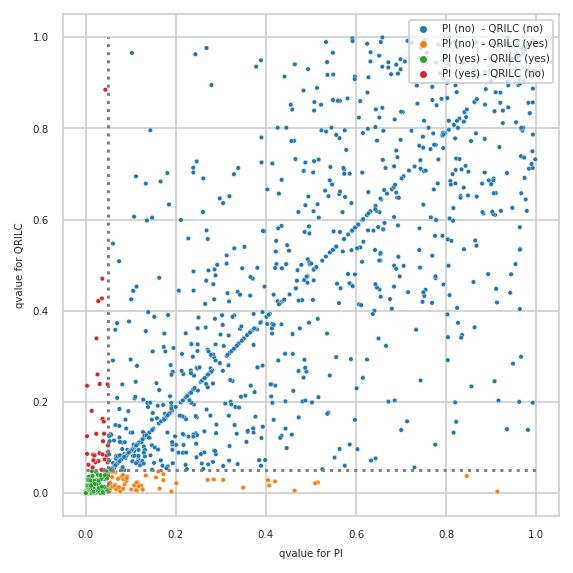

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


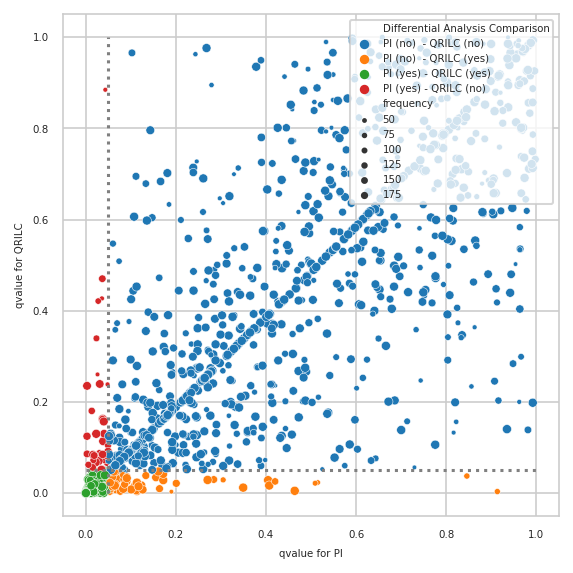

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out